In [1]:
import matplotlib.pyplot as plt
import shapely
from shapely.geometry import LineString, Point
import math
import numpy as np

In [3]:
def next_point(dist, angle):
    y = dist * math.sin(math.radians(angle))
    x = dist * math.cos(math.radians(angle))
    
    return Point([x, y])

def get_angle_max(dist_frac, force=1):
    
    
    if force == 1:
        angle = 52.88450752 * dist_frac ** -0.8643306
    elif force == 2:
        angle = 52.88450752 * dist_frac ** -0.78643306
    elif force == 3:
        angle = 52.88450752 * dist_frac ** -0.68643306
    
#     angle[angle < 15] = 10
#     angle[angle > 90] = 90

    if angle > 90:
        return 90
    elif angle < 15:
        return 15
    
    return angle

def get_line(length_source, x_array, force=1, negative=False):
    pontos_linha = [Point([0,0])]
    for x in x_array:
        
        angle = get_angle_max(x, force)
        
        next_p = next_point(x*length_source, angle)
        
        if negative:
            next_p = Point([next_p.x, -next_p.y])

        pontos_linha.append(next_p)
        
    return LineString(pontos_linha)

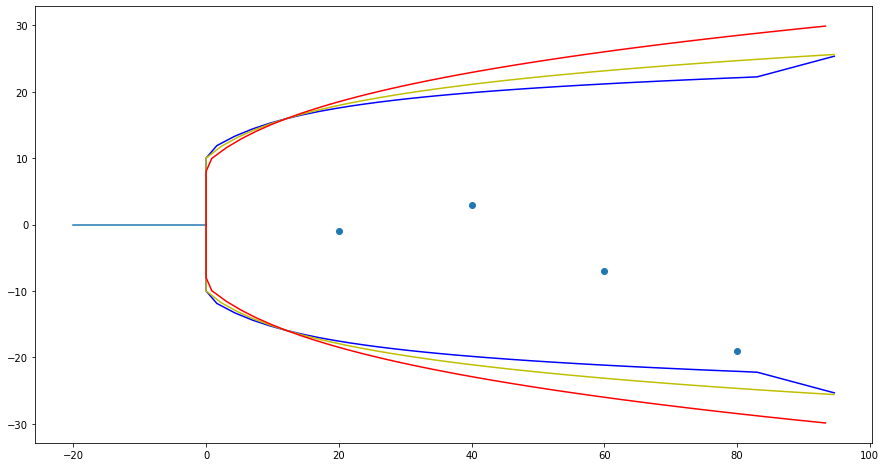

In [114]:
length = 20

line_source = LineString([Point([-length,0]), Point([0,0])])
x_source , y_source = line_source.xy

x_p = np.arange(20, 5*length, length)
y_p = np.random.randint(-length, length, x_p.shape[0])

x_arr = np.arange(0.1, 5, 0.1)

# Eq 1
line1_1 = get_line(length, x_arr)
line1_2 = get_line(length, x_arr, negative=True)
x_1_1 , y_1_1 = line1_1.xy
x_1_2 , y_1_2 = line1_2.xy

# Eq 2
line2_1 = get_line(length, x_arr, 2)
line2_2 = get_line(length, x_arr, 2, negative=True)
x_2_1 , y_2_1 = line2_1.xy
x_2_2 , y_2_2 = line2_2.xy

# Eq 3
line3_1 = get_line(length, x_arr, 3)
line3_2 = get_line(length, x_arr, 3, negative=True)
x_3_1 , y_3_1 = line3_1.xy
x_3_2 , y_3_2 = line3_2.xy


# Polt
fig, axs = plt.subplots(figsize=(15,15))
axs.set_aspect('equal')
# axs.set_xlim(-length, 5*length)

# Linha primária
axs.plot(x_source, y_source)

# Linha 1
axs.plot(x_1_1, y_1_1, c='b')
axs.plot(x_1_2, y_1_2, c='b')

# Linha 2
axs.plot(x_2_1, y_2_1, c='y')
axs.plot(x_2_2, y_2_2, c='y')

# Linha 3
axs.plot(x_3_1, y_3_1, c='r')
axs.plot(x_3_2, y_3_2, c='r')

# Pontos
axs.scatter(x_p, y_p);